## Train  model using PCA Components
###  Model is trained with XGBoost installed in notebook instance

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
column_list_file = 'bike_train_column_list_pca.txt'
train_file = 'bike_train_pca.csv'
validation_file = 'bike_validation_pca.csv'
test_file = 'bike_test_pca.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [4]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1',
 'component_2']

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [6]:
df_train.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,4.477337,3,0,0,2,2011,9,3,5,0,1.081421,-0.937364,-0.014431
1,5.517453,3,0,1,1,2012,8,13,0,14,2.192260,0.507226,-1.412858


In [7]:
df_validation.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,6.095825,3,0,1,2,2011,7,7,3,8,1.511799,-0.648078,0.755707
1,5.961005,2,0,0,1,2011,6,11,5,13,2.344418,0.211416,-0.073554


In [8]:
df_train.iloc[:,1:-2].head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0
0,3,0,0,2,2011,9,3,5,0,1.081421
1,3,0,1,1,2012,8,13,0,14,2.192260


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150,n_estimators=150)

In [11]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [12]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:3.90417	validation_1-rmse:3.91436
[1]	validation_0-rmse:3.52485	validation_1-rmse:3.53364
[2]	validation_0-rmse:3.18439	validation_1-rmse:3.19215
[3]	validation_0-rmse:2.87804	validation_1-rmse:2.88492
[4]	validation_0-rmse:2.60205	validation_1-rmse:2.60833
[5]	validation_0-rmse:2.35445	validation_1-rmse:2.35977
[6]	validation_0-rmse:2.1335	validation_1-rmse:2.13889
[7]	validation_0-rmse:1.93422	validation_1-rmse:1.94019
[8]	validation_0-rmse:1.75598	validation_1-rmse:1.76186
[9]	validation_0-rmse:1.59734	validation_1-rmse:1.60238
[10]	validation_0-rmse:1.45478	validation_1-rmse:1.45954
[11]	validation_0-rmse:1.32733	validation_1-rmse:1.33223
[12]	validation_0-rmse:1.21176	validation_1-rmse:1.21685
[13]	validation_0-rmse:1.10638	validation_1-rmse:1.11297
[14]	validation_0-rmse:1.01552	validation_1-rmse:1.0222
[15]	validation_0-rmse:0.929391	validation_1-rmse:0.937292
[16]	validation_0-rmse:0.857935	validation_1-rmse:0.866833
[17]	validation_0-rmse:0.792153	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [13]:
eval_result = regressor.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

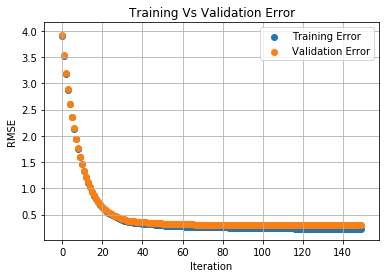

In [15]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

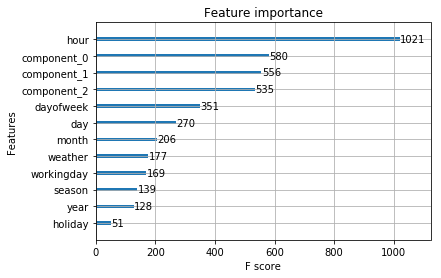

In [16]:
xgb.plot_importance(regressor)

In [18]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [19]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [20]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095


In [21]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [22]:
X_test.head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095


In [23]:
result = regressor.predict(X_test)

In [24]:
result[:5]

array([2.477745 , 1.868279 , 1.611922 , 1.0965617, 1.0515537],
      dtype=float32)

In [25]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [26]:
df_test.head()

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086,10.914368
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095,5.477139
2,2011-01-20 02:00:00,1,0,1,1,2011,1,20,3,2,-1.629284,-0.856109,-1.439095,4.012436
3,2011-01-20 03:00:00,1,0,1,1,2011,1,20,3,3,-1.735344,0.102855,-0.494568,1.993854
4,2011-01-20 04:00:00,1,0,1,1,2011,1,20,3,4,-1.735344,0.102855,-0.494568,1.862095


In [27]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count


In [28]:
df_test['count'] = df_test['count'].map(adjust_count)

In [29]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count


In [30]:
df_test[['datetime','count']].to_csv('predicted_count_pca.csv',index=False)